<h2>Figure 2 </h2>

In [1]:
import numpy as np
from numpy.linalg import matrix_power
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm


In [2]:
d = 1;   
# mean values
mu1 = np.zeros(shape=(d,1))  
mu2 = np.zeros(shape=(d,1))

Sigma2 = np.eye(1, dtype=float)
#print(Sigma2)
Sigma2_det = np.linalg.det(Sigma2)
print(Sigma2_det)
Sigma2_inv = np.linalg.inv(Sigma2)
print(Sigma2_inv)

1.0
[[1.]]


In [3]:
eps = np.array([0.1, -0.2])# perturbation
print(eps)

[ 0.1 -0.2]


0
1


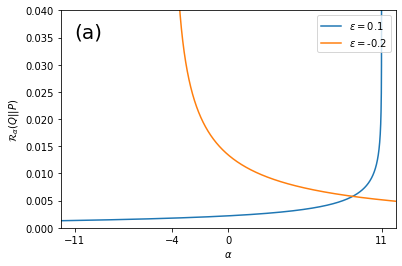

In [4]:
for iter in range(2): #length(eps)
    print(iter)
    Sigma1_new = np.eye(d, dtype=float)+ eps[iter]
    Sigma1_det = np.linalg.det(Sigma1_new)
    Sigma1_inv = np.linalg.inv(Sigma1_new)

    #Renyi estimation
    dalpha = 0.0001 # discretization length 
    alpha = np.arange(-12, 12, dalpha)  
    #print(alpha[0], alpha[-1])
    No_alpha = np.size(alpha)
    
    RD_exact = np.zeros((No_alpha, 1))
    idx = np.full((No_alpha, 1), False) #create boolean array
    
    for i in range(No_alpha):
        Sigma_inv_alpha = alpha[i]*Sigma1_inv + (1-alpha[i])*Sigma2_inv
        lambda_inv_alpha, v = np.linalg.eig(Sigma_inv_alpha)
        #print(lambda_inv_alpha)
        #print(i)
        if np.all(lambda_inv_alpha>0.):   
            #print('entered')
            idx[i] = True
            
            # exact (analytical formula estimation)
            Sigma_alpha = (1-alpha[i])*Sigma1_new + alpha[i]*Sigma2
            np.linalg.inv(Sigma_alpha)
            if alpha[i] == 0:
                RD_exact[i] = 0.5 * ((mu1-mu2)*Sigma1_inv*(mu1-mu2) + np.trace(Sigma1_inv*Sigma2) + np.log(Sigma1_det/Sigma2_det) - d)
            elif alpha[i] == 1:   
                RD_exact[i] = 0.5 * ((mu1-mu2)*Sigma2_inv*(mu1-mu2) + np.trace(Sigma2_inv*Sigma1_new) + np.log(Sigma2_det/Sigma1_det) - d)
            else:
                RD_exact[i] = 0.5 * (mu1-mu2) * np.linalg.inv(Sigma_alpha) * (mu1-mu2) + 1/(2*alpha[i]*(1-alpha[i])) * np.log( np.linalg.det(Sigma_alpha) / (np.power(Sigma1_det,(1-alpha[i])) * np.power(Sigma2_det,alpha[i]))) 
              
         
    # plotting  
    if iter == 0:
        #fig, ax = plt.subplots()
        #ax.set_xlabel("alpha")
        #ax.plot(alpha[1:180000], RD_exact[1:180000], '-')        
        #plt.subplot(1, 2, 1)
        
        fig = plt.figure()
        plt.plot(alpha[1:230000], RD_exact[1:230000], '-', label=r'$\epsilon = $'+np.array2string(eps[iter], precision=2))
        plt.ylabel(r'$\mathcal{R}_{\alpha}(Q||P)$')
        plt.xlabel(r'$\alpha$')
        plt.text(-11, 0.035, r'(a)', fontsize=20)
        
    elif iter == 1:
        #ax.plot(alpha[30002:end], RD_exact[30002:end], '-')
        #plt.legend("-0.1")
        #plt.subplot(1, 2, 2)
        plt.plot(alpha[80002:], RD_exact[80002:], '-', label=r'$\epsilon = $'+np.array2string(eps[iter], precision=2))
        plt.legend(loc='upper right')
        plt.ylim([0, 0.04])
        plt.xlim([-12, 12])
        plt.xticks([-11, -4, 0, 11])
       
    

In [5]:
# b. 2-D Gaussians R(Q||P)
#=========================
# Q = N([0,0], \Sigma_1),                 |1    \rho |             |1  0|
# P = N([0,0], \Sigma_2)        Sigma_1 =                Sigma_2 =
#==============                           |\rho   1  |             |0  1|

In [6]:
d = 2   
# mean values
mu1 = np.zeros(shape=(d,1))  
mu2 = np.zeros(shape=(d,1))

Sigma2 = np.eye(d, dtype=float)
#print(Sigma2)
Sigma2_det = np.linalg.det(Sigma2)
print(Sigma2_det)
Sigma2_inv = np.linalg.inv(Sigma2)
print(Sigma2_inv)

eps = np.array([0.2, -0.1])# perturbation
print(eps)
rho = np.array([0.1, 0.2])

1.0
[[1. 0.]
 [0. 1.]]
[ 0.2 -0.1]


0
0.99
[[ 1.01010101 -0.1010101 ]
 [-0.1010101   1.01010101]]
1
0.96
[[ 1.04166667 -0.20833333]
 [-0.20833333  1.04166667]]


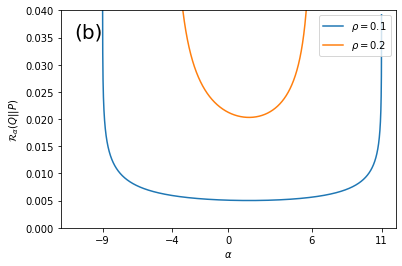

In [7]:
for p in range(2): #length(eps)
    print(p)
    Sigma1_new = np.eye(d);
    Sigma1_new[0,1] = rho[p]
    Sigma1_new[1,0] = rho[p]
        
    Sigma1_det = np.linalg.det(Sigma1_new)
    Sigma1_inv = np.linalg.inv(Sigma1_new)
    print(Sigma1_det)
    print(Sigma1_inv)

    #Renyi estimation
    dalpha = 0.001 # discretization length 
    alpha = np.arange(-20, 20, dalpha)  
    #print(alpha[0], alpha[-1])
    No_alpha = np.size(alpha)
    
    RD_exact = np.zeros((No_alpha, 1))
    idx = np.full((No_alpha, 1), False) #create boolean array
    
    for i in range(No_alpha): 
        Sigma_inv_alpha = alpha[i]*Sigma1_inv + (1-alpha[i])*Sigma2_inv
        #print('Sigma_inv_alpha = ',Sigma_inv_alpha)
        lambda_inv_alpha, v = np.linalg.eig(Sigma_inv_alpha)
        #print('lambda_inv_alpha=',lambda_inv_alpha)
        #print(i)
        if np.all(lambda_inv_alpha > 0.0):  
            #print('entered')
            idx[i] = True
            
            # exact (analytical formula estimation)
            Sigma_alpha = (1-alpha[i])*Sigma1_new + alpha[i]*Sigma2
            np.linalg.inv(Sigma_alpha)
            if alpha[i] == 0:
                RD_exact[i] = 0.5 * ( np.matmul( np.matmul( (mu1-mu2).transpose(), Sigma1_inv), (mu1-mu2)) + np.trace(np.matmul(Sigma1_inv, Sigma2)) + np.log(Sigma1_det/Sigma2_det) - d)
            elif alpha[i] == 1:   
                RD_exact[i] = 0.5 * ( np.matmul( np.matmul((mu1-mu2).transpose(), Sigma2_inv), (mu1-mu2)) + np.trace(np.matmul(Sigma2_inv, Sigma1_new)) + np.log(Sigma2_det/Sigma1_det) - d)
            else:
                RD_exact[i] = 0.5 * np.matmul( np.matmul((mu1-mu2).transpose(),np.linalg.inv(Sigma_alpha)), (mu1-mu2)) + 1/(2*alpha[i]*(1-alpha[i])) * np.log( np.linalg.det(Sigma_alpha) / (np.power(Sigma1_det,(1-alpha[i])) * np.power(Sigma2_det,alpha[i]))) 
              
    # plotting  
    if p == 0:
        fig = plt.figure()
        plt.plot(alpha[11002:31000], RD_exact[11002:31000], '-', label=r'$\rho = $'+np.array2string(rho[p], precision=2))
        plt.ylabel(r'$\mathcal{R}_{\alpha}(Q||P)$')
        plt.xlabel(r'$\alpha$')
        plt.text(-11, 0.035, r'(b)', fontsize=20)

        
    elif p == 1:
        plt.plot(alpha[16001:25999], RD_exact[16001:25999], '-', label=r'$\rho = $'+np.array2string(rho[p], precision=2))
        plt.legend(loc='upper right')
        plt.ylim([0, 0.04])
        plt.xlim([-12, 12])
        plt.xticks([-9, -4, 0, 6, 11])
        
        

In [8]:
# c. and d.  1-D GMM and 1-D Gaussian R(p||q) (RD using statistical estimation)
#===============================================================================

In [9]:
d = 1 #dimension
dx = 0.005
x_sup = np.arange(-20, 20, dx)   # Support of distributions p, q

# Gaussian vs GMM  (Vary mass of the smaller mode in p AND alpha)
# parameters of GMM distribution p
mu0 = 0
sigma1 = 1 #2;
# parameters of Gaussian distribution q
mu1 = 0
mu2 = 2 #1 
sigma2 = 1

w = np.array([0.01, 0.02, 0.1, 0.2]) # percentage of samples in the smaller (Gaussian) mode

dalpha = 0.02
alpha = np.arange(-100, 100, dalpha)  

Ra = np.zeros((np.size(alpha), np.size(w))); # alpha's x w's


In [51]:
for j in range(np.size(w)):  # as w increases, more samples (mass) are transfered to the smaller mode
    
    p = (1-w[j])*norm.pdf(x_sup, loc=mu1, scale=sigma2) + w[j]*norm.pdf(x_sup, loc=mu2, scale=sigma2/4); #GMM
    q = norm.pdf(x_sup, loc=mu0, scale=sigma1) # Gaussian
    
    for i in range(np.size(alpha)): 
        # Compute (analytically) the Renyi divergence between p & q densities.
        # ASSUMPTION: p, q contain the same # samples...
        
        if np.abs(alpha[i] - 0) < dalpha: # alpha = 0 -> use reverse KL divergence
            tmp = (np.log(q)-np.log(p)) * q
            Ra[i,j] = np.sum(tmp) * dx
        elif np.abs(alpha[i] - 1) < dalpha: # alpha = 1 -> use KL divergence
            tmp = (np.log(p)-np.log(q)) * p
            Ra[i,j] = np.sum(tmp) * dx
        else:
            tmp = np.log(p)*alpha[i] + np.log(q)*(1-alpha[i])
            Ra[i,j] = 1/(alpha[i]*(alpha[i]-1)) * np.log(np.sum(np.exp(tmp)) * dx)



([<matplotlib.axis.XTick at 0x7f086c6a5128>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

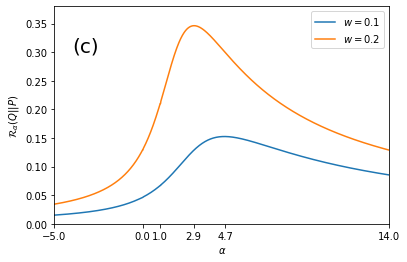

In [56]:
fig = plt.figure()

plt.plot(alpha[:], Ra[:,2], '-', label=r'$w = $'+np.array2string(w[2], precision=2)) 
plt.plot(alpha, Ra[:,3], '-', label=r'$w = $'+np.array2string(w[3], precision=2))

plt.legend(loc='upper right')
plt.ylabel(r'$\mathcal{R}_{\alpha}(Q||P)$')
plt.xlabel(r'$\alpha$')
plt.text(-4, 0.3, r'(c)', fontsize=20)
plt.ylim([0, 0.38])
plt.xlim([-5, 14])
plt.xticks([-5, 0, 1, 2.9, 4.7, 14])

([<matplotlib.axis.XTick at 0x7f086c8a0278>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

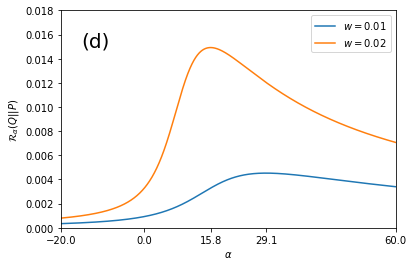

In [57]:
fig = plt.figure()

plt.plot(alpha[:], Ra[:,0], '-', label=r'$w = $'+np.array2string(w[0], precision=2)) 
plt.plot(alpha, Ra[:,1], '-', label=r'$w = $'+np.array2string(w[1], precision=2))

plt.legend(loc='upper right')
plt.ylabel(r'$\mathcal{R}_{\alpha}(Q||P)$')
plt.xlabel(r'$\alpha$')
plt.text(-15,0.015, r'(d)', fontsize=20)
plt.ylim([0, 0.018])
plt.xlim([-20, 60])
plt.xticks([-20, 0, 15.8, 29.1, 60])